In [79]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates

In [23]:
data_2005 = pd. read_csv('../data/data_2005.csv', skiprows=[0,1,2,3])
data_2005.columns = data_2005.columns.str.replace(' ', '')

In [12]:
data_2005

,Date,Week,Min,Max,Avg,Avg II,Dev,Dev %,Rain,Flag,...,Trap1_%,Trap2_Count,Trap2_Sum,Trap2_%,Trap3_Count,Trap3_Sum,Trap3_%,Percent_Sum,Percent_Avg,Percent_%
0,1/1/2005,1,1.80,6.00,4.01,3.90,0.11,2.70,5.80,0,...,-,NaN,0,-,NaN,0,-,0,0,-
1,1/2/2005,1,-,7.00,3.03,3.50,0.47,15.62,-,0,...,-,NaN,0,-,NaN,0,-,0,0,-
2,1/3/2005,2,1.00,4.00,2.41,2.50,0.09,3.54,1.00,0,...,-,NaN,0,-,NaN,0,-,0,0,-
3,1/4/2005,2,-,6.50,4.70,3.25,1.45,30.79,18.10,0,...,-,NaN,0,-,NaN,0,-,0,0,-
4,1/5/2005,2,3.00,6.60,5.21,4.80,0.41,7.95,1.50,0,...,-,NaN,0,-,NaN,0,-,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2005,53,-6.75,-2.13,-4.55,-4.44,0.11,2.40,-,1,...,212.17,NaN,388,100.00,NaN,380,100.00,789,395,100.00
361,12/28/2005,53,-7.50,-2.94,-5.94,-5.22,0.72,12.17,3.50,1,...,212.17,NaN,388,100.00,NaN,380,100.00,789,395,100.00
362,12/29/2005,53,-10.75,-1.19,-4.70,-5.97,1.27,26.92,2.00,1,...,212.17,NaN,388,100.00,NaN,380,100.00,789,395,100.00
363,12/30/2005,53,-12.62,-3.69,-6.43,-8.15,1.72,26.77,5.40,1,...,212.17,NaN,388,100.00,NaN,380,100.00,789,395,100.00


In [116]:
# prepared_data = data_2005[['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count']].copy()
needed_columns = ['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count']

df = data_2005.filter(['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count'], axis=1)

In [117]:
prepared_data['Trap3_Count'].count()

65

In [118]:
df.update(df[needed_columns[2:]].fillna(0))

In [119]:
df['sum_trap'] = df[needed_columns[2:]].sum(axis=1)

In [120]:
df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))

/tmp/ipykernel_11097/3631092531.py:1: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))


,pos,val
Date,0,1/1/2005
Avg,0,4.01
Trap1_Count,140,2.0
Trap2_Count,142,1.0
Trap3_Count,140,1.0
sum_trap,140,3.0


In [121]:
df = df.loc[120:284]
# df = df.loc[120:140]

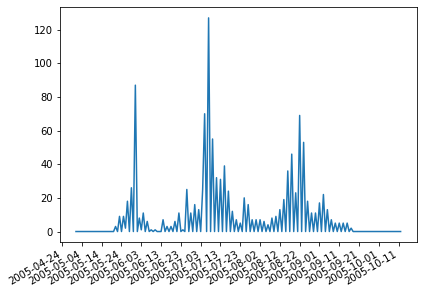

In [123]:
x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in df['Date']]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(x_values,df['sum_trap'])
plt.gcf().autofmt_xdate()
plt.show()

In [60]:
df.loc[140:284]

,Date,Avg,Trap1_Count,Trap2_Count,Trap3_Count,sum_trap
140,5/21/2005,14.09,2.0,0.0,1.0,3.0
141,5/22/2005,16.25,0.0,0.0,0.0,0.0
142,5/23/2005,17.48,5.0,1.0,3.0,9.0
143,5/24/2005,13.79,0.0,0.0,0.0,0.0
144,5/25/2005,14.72,2.0,4.0,3.0,9.0
...,...,...,...,...,...,...
280,10/8/2005,10.29,0.0,0.0,0.0,0.0
281,10/9/2005,8.98,0.0,0.0,0.0,0.0
282,10/10/2005,9.86,0.0,0.0,0.0,0.0
283,10/11/2005,7.43,0.0,0.0,0.0,0.0


In [59]:
df.index[df['Date'] == '10/12/2005']

Int64Index([284], dtype='int64')